In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
data = pd.read_csv(r"C:\Users\Sid\Desktop\vit\DataScience Projects\EPL football analysis\Datasets\final_dataset.csv")


In [16]:
data.head()

,Unnamed: 0,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,...,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts
0,0,19/08/00,Charlton,Man City,4,0,H,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
1,1,19/08/00,Chelsea,West Ham,4,2,H,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
2,2,19/08/00,Coventry,Middlesbrough,1,3,NH,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
3,3,19/08/00,Derby,Southampton,2,2,NH,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
4,4,19/08/00,Leeds,Everton,2,0,H,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0


In [17]:
data.tail()

,Unnamed: 0,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,...,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts
6835,6835,13/05/18,Newcastle,Chelsea,3,0,H,36,62,47,...,0,0,1,0,0,0,-0.289474,0.710526,-0.763158,-0.263158
6836,6836,13/05/18,Southampton,Man City,0,1,NH,37,105,55,...,0,0,1,0,0,0,-0.473684,2.052632,-1.605263,-0.131579
6837,6837,13/05/18,Swansea,Stoke,1,2,NH,27,33,54,...,0,0,0,0,0,0,-0.710526,-0.894737,0.078947,-0.052632
6838,6838,13/05/18,Tottenham,Leicester,5,4,H,69,52,32,...,0,0,0,0,0,0,0.973684,-0.078947,0.710526,0.078947
6839,6839,13/05/18,West Ham,Everton,3,1,H,45,43,67,...,0,0,0,0,0,0,-0.578947,-0.315789,-0.263158,-0.105263


In [18]:
data['Result'] = np.where(data['FTHG'] > data['FTAG'], 'Win', np.where(data['FTHG'] < data['FTAG'], 'Loss', 'Draw'))


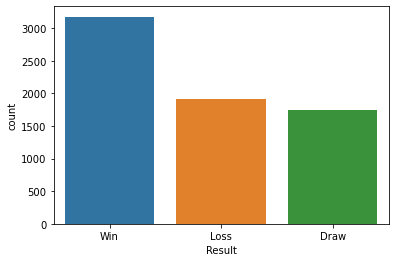

In [19]:
sns.countplot(x='Result', data=data)
plt.show()

In [20]:
home_goals = data.groupby('HomeTeam')['FTHG'].sum().reset_index()
away_goals = data.groupby('AwayTeam')['FTAG'].sum().reset_index()
goals = home_goals.merge(away_goals, left_on='HomeTeam', right_on='AwayTeam')
goals['Total Goals'] = goals['FTHG'] + goals['FTAG']
goals = goals[['HomeTeam', 'Total Goals']].rename(columns={'HomeTeam': 'Team'})

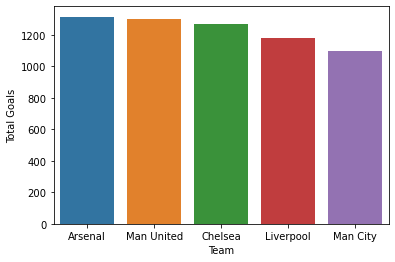

In [24]:
top_5 = goals.sort_values('Total Goals', ascending=False)[:5]
sns.barplot(x='Team', y='Total Goals', data=top_5)
plt.show()

In [30]:
# Average number of goals scored and conceded by each team
home_avg = data.groupby('HomeTeam')['FTHG', 'FTAG'].mean().reset_index().rename(columns={'FTHG': 'Home Goals', 'FTAG': 'Home Conceded'})
away_avg = data.groupby('AwayTeam')['FTAG', 'FTHG'].mean().reset_index().rename(columns={'FTAG': 'Away Goals', 'FTHG': 'Away Conceded'})
avg = home_avg.merge(away_avg, left_on='HomeTeam', right_on='AwayTeam')
avg['Total Goals Scored'] = avg['Home Goals'] + avg['Away Goals']
avg['Total Goals Conceded'] = avg['Home Conceded'] + avg['Away Conceded']
avg = avg[['HomeTeam', 'Total Goals Scored', 'Total Goals Conceded']].rename(columns={'HomeTeam': 'Team'})


C:\Users\Sid\AppData\Local\Temp\ipykernel_41312\3534695702.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  home_avg = data.groupby('HomeTeam')['FTHG', 'FTAG'].mean().reset_index().rename(columns={'FTHG': 'Home Goals', 'FTAG': 'Home Conceded'})
C:\Users\Sid\AppData\Local\Temp\ipykernel_41312\3534695702.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  away_avg = data.groupby('AwayTeam')['FTAG', 'FTHG'].mean().reset_index().rename(columns={'FTAG': 'Away Goals', 'FTHG': 'Away Conceded'})


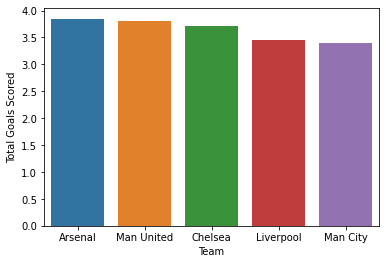

In [31]:
# Top 10 teams with the highest average number of goals scored
top_5_avg = avg.sort_values('Total Goals Scored', ascending=False)[:5]
sns.barplot(x='Team', y='Total Goals Scored', data=top_5_avg)
plt.show()



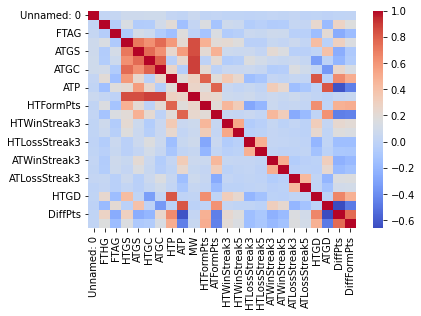

In [32]:
# Correlation matrix
corr_matrix = data.corr()
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.show()

In [33]:
# Create a new dataframe with all the teams and the total number of goals they conceded as the away team
away_conceded = data.groupby('AwayTeam')['FTHG'].sum().reset_index().rename(columns={'AwayTeam': 'Team', 'FTHG': 'Goals Conceded'})

# Create a new dataframe with all the teams and the total number of goals they conceded as the home team
home_conceded = data.groupby('HomeTeam')['FTAG'].sum().reset_index().rename(columns={'HomeTeam': 'Team', 'FTAG': 'Goals Conceded'})

# Merge the two dataframes to get the total number of goals conceded by each team
total_conceded = pd.concat([away_conceded, home_conceded]).groupby('Team')['Goals Conceded'].sum().reset_index()


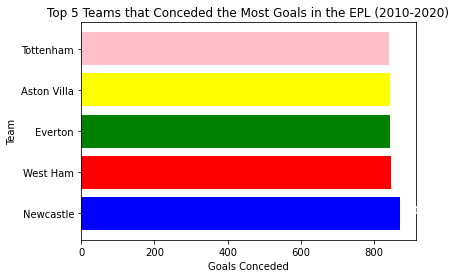

In [45]:
# Find the top 5 teams that conceded the most goals
top_5_conceded = total_conceded.nlargest(5, 'Goals Conceded')

# Create a horizontal bar chart to display the top 5 teams that conceded the most goals
plt.barh(top_5_conceded['Team'], top_5_conceded['Goals Conceded'], color=['blue', 'red', 'green', 'yellow', 'pink'])

# Add labels to the values on the chart
for index, value in enumerate(top_5_conceded['Goals Conceded']):
    plt.text(value, index, str(value), color='white', fontweight='bold')

plt.xlabel('Goals Conceded')
plt.ylabel('Team')
plt.title('Top 5 Teams that Conceded the Most Goals in the EPL (2010-2020)')
plt.show()